In [1]:
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'png', 'retina'}

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. EDA


In [2]:
df_train = pd.read_csv("./data/train.csv")
print(df_train.shape)
df_train.tail(5)

(4617600, 4)


,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [3]:
df_key = pd.read_csv("./data/key.csv")
print(df_key.shape)
df_key.tail(5)

(45, 2)


,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


## station nbr 추가

In [4]:
df_train_key = pd.merge(df_train, df_key, on='store_nbr', how='left')
print(df_train_key.shape)
df_train_key.tail(5)

(4617600, 5)


,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,45,107,0,16
4617596,2014-10-31,45,108,0,16
4617597,2014-10-31,45,109,0,16
4617598,2014-10-31,45,110,0,16
4617599,2014-10-31,45,111,0,16


In [5]:
df_wal_weather = pd.read_csv("./data/weather.csv")
print(df_wal_weather.shape)
df_wal_weather.tail(5)

(20517, 20)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


### weather data column 탐색
- ['station_nbr'] : 변화 없음

- ['date'] : 년/월/일을 새로 추가해준다

In [6]:
def MakeYear(x):
    A = re.search(r'\d\d\d\d', str(x))
    return A.group()

def MakeMonth(x):
    A = re.search(r'-\d\d-', str(x))
    B = re.search(r'\d\d', str(A))
    return B.group()

def MakeDay(x):
    A = re.search(r'(-\d\d)-(\d\d)', str(x))
    return A.group(2)

In [7]:
df_wal_weather['year'] = df_wal_weather['date'].apply(MakeYear)
df_wal_weather['year'].unique()

array(['2012', '2013', '2014'], dtype=object)

In [8]:
df_wal_weather['month'] = df_wal_weather['date'].apply(MakeMonth)
df_wal_weather['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [9]:
df_wal_weather['day'] = df_wal_weather['date'].apply(MakeDay)
df_wal_weather['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

- 요일도 추가한다
- Python starts with 0 = Monday.

In [10]:
def Integerize(x):
    x = int(x)
    return x

In [11]:
df_wal_weather['year'] = df_wal_weather['year'].apply(Integerize)
df_wal_weather['month'] = df_wal_weather['month'].apply(Integerize)
df_wal_weather['day'] = df_wal_weather['day'].apply(Integerize)

In [12]:
import datetime


weekday = list()
for i in range(len(df_wal_weather)):
    weekday.append(datetime.datetime(df_wal_weather['year'][i], df_wal_weather['month'][i], df_wal_weather['day'][i]).weekday())

In [13]:
df_wal_weather['weekday'] = weekday

In [14]:
df_wal_weather.tail(100)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20417,1,2014-10-27,61,41,51,M,38,44,14,0,-,-,,M,0.00,29.70,29.89,6.3,27,7.3,2014,10,27,0
20418,2,2014-10-27,57,41,49,3,37,43,16,0,0614,1648,,0.0,0.00,28.77,29.91,12.0,28,12.3,2014,10,27,0
20419,3,2014-10-27,82,66,74,16,57,63,0,9,0641,1733,VCTS,0.0,0.00,29.04,29.72,12.6,19,16.0,2014,10,27,0
20420,4,2014-10-27,86,62,74,6,61,66,0,9,0641,1748,,0.0,0.00,29.20,29.88,5.0,18,5.6,2014,10,27,0
20421,5,2014-10-27,M,M,M,M,38,M,M,M,0611,1645,,M,M,M,29.91,13.4,28,M,2014,10,27,0
20422,6,2014-10-27,87,53,70,4,59,64,0,5,0641,1748,BCFG BR,0.0,0.00,29.36,29.88,9.1,18,9.3,2014,10,27,0
20423,7,2014-10-27,84,64,74,M,52,60,0,9,-,-,,0.0,0.00,28.42,29.73,7.5,21,15.8,2014,10,27,0
20424,8,2014-10-27,86,61,74,M,64,67,0,9,-,-,HZ,M,0.00,29.55,M,6.3,18,6.5,2014,10,27,0
20425,9,2014-10-27,68,44,56,M,40,47,9,0,-,-,,M,0.00,28.86,29.62,4.9,29,6.8,2014,10,27,0
20426,10,2014-10-27,90,65,78,M,62,67,0,13,0637,1744,BR,M,0.00,30.02,30.06,1.6,16,5.9,2014,10,27,0


## Missing data

In [15]:
for i in df_wal_weather.columns:
    print(i, "\n", df_wal_weather[i].unique())

station_nbr 
 [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45'
 '60' '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26'
 '71' '58' '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75'
 '33' '51' '57' '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14'
 '22' '13' '10' '20' '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82'
 '83' '88' '87' '92' '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M'
 '97' '98' '101' '99' '100' '105' '103' '102' '106' '104' '109' '107'
 '108' '110' '111' '112' '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1'
 '6' '2' '3' '7' '-2' '-11' '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25'
 '41' '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10'
 '5' '32' '20' '3' '8' '44' '46' '17' '55' '43' '57'

In [16]:
for i in df_wal_weather.columns:
    df_wal_weather[i] = df_wal_weather[i].replace('-', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace(' ', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace('M', np.nan)

In [17]:
for i in df_wal_weather.columns:
    print(i, "\n", df_wal_weather[i].unique())

station_nbr 
 [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45'
 '60' '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26'
 '71' '58' '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75'
 '33' '51' '57' '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14'
 '22' '13' '10' '20' '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82'
 '83' '88' '87' '92' '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' nan
 '97' '98' '101' '99' '100' '105' '103' '102' '106' '104' '109' '107'
 '108' '110' '111' '112' '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1'
 '6' '2' '3' '7' '-2' '-11' '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25'
 '41' '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10'
 '5' '32' '20' '3' '8' '44' '46' '17' '55' '43' '57'

In [18]:
df_wal_weather.tail(5)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4


In [19]:
#missingdata 찾기
def graph_na(data_train):
    plt.figure()
    missing_data_count = data_train.isnull().sum()
    missing_data_count.sort_values(ascending = False, inplace = True)
    missing_data_count_filtered = missing_data_count[missing_data_count > 0]
    missing_data_count_filtered.plot(kind = 'bar', title = 'missing data count')
    plt.show()

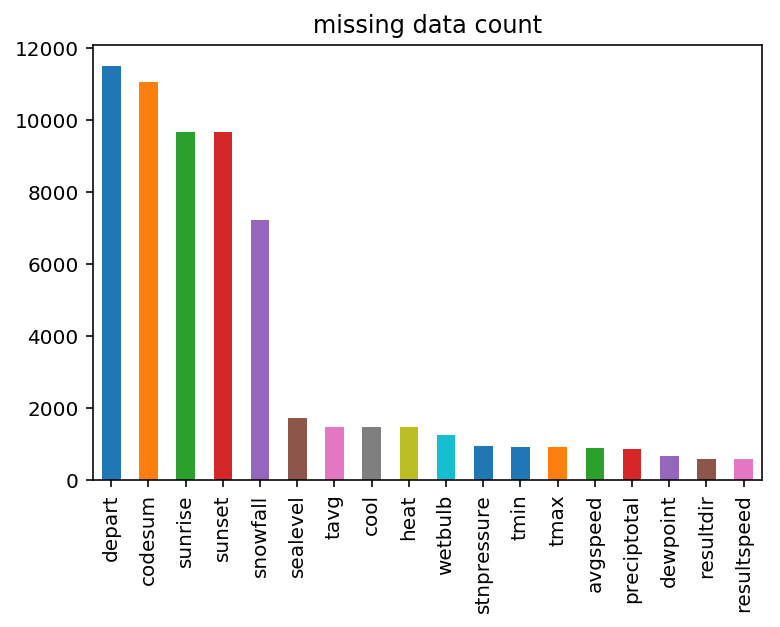

In [20]:
graph_na(df_wal_weather)

- temperature

In [21]:
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4


In [22]:
type(df_wal_weather['tmax'][0])

str

In [23]:
def Floaterize(x):
    x = float(x)
    return x

In [24]:
df_wal_weather['tmax'] = df_wal_weather['tmax'].apply(Floaterize)
df_wal_weather['tmin'] = df_wal_weather['tmin'].apply(Floaterize)
df_wal_weather['tavg'] = df_wal_weather['tavg'].apply(Floaterize)
df_wal_weather['depart'] = df_wal_weather['depart'].apply(Floaterize)

In [25]:
type(df_wal_weather['tmax'][0])

numpy.float64

In [26]:
df_wal_weather.describe()

,station_nbr,tmax,tmin,tavg,depart,year,month,day,weekday
count,20517.000000,19611.000000,19609.000000,19048.000000,9006.000000,20517.000000,20517.000000,20517.000000,20517.000000
mean,10.549057,71.621131,50.654546,61.240130,1.363091,2012.946971,6.249208,15.731150,2.998050
std,5.768533,19.847451,19.139055,19.194357,7.646759,0.801828,3.321448,8.801119,2.000097
min,1.000000,-11.000000,-21.000000,-16.000000,-35.000000,2012.000000,1.000000,1.000000,0.000000
25%,6.000000,59.000000,37.000000,48.000000,-3.000000,2012.000000,3.000000,8.000000,1.000000
50%,11.000000,76.000000,53.000000,65.000000,2.000000,2013.000000,6.000000,16.000000,3.000000
75%,16.000000,87.000000,67.000000,77.000000,6.000000,2014.000000,9.000000,23.000000,5.000000
max,20.000000,114.000000,88.000000,100.000000,33.000000,2014.000000,12.000000,31.000000,6.000000


In [27]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

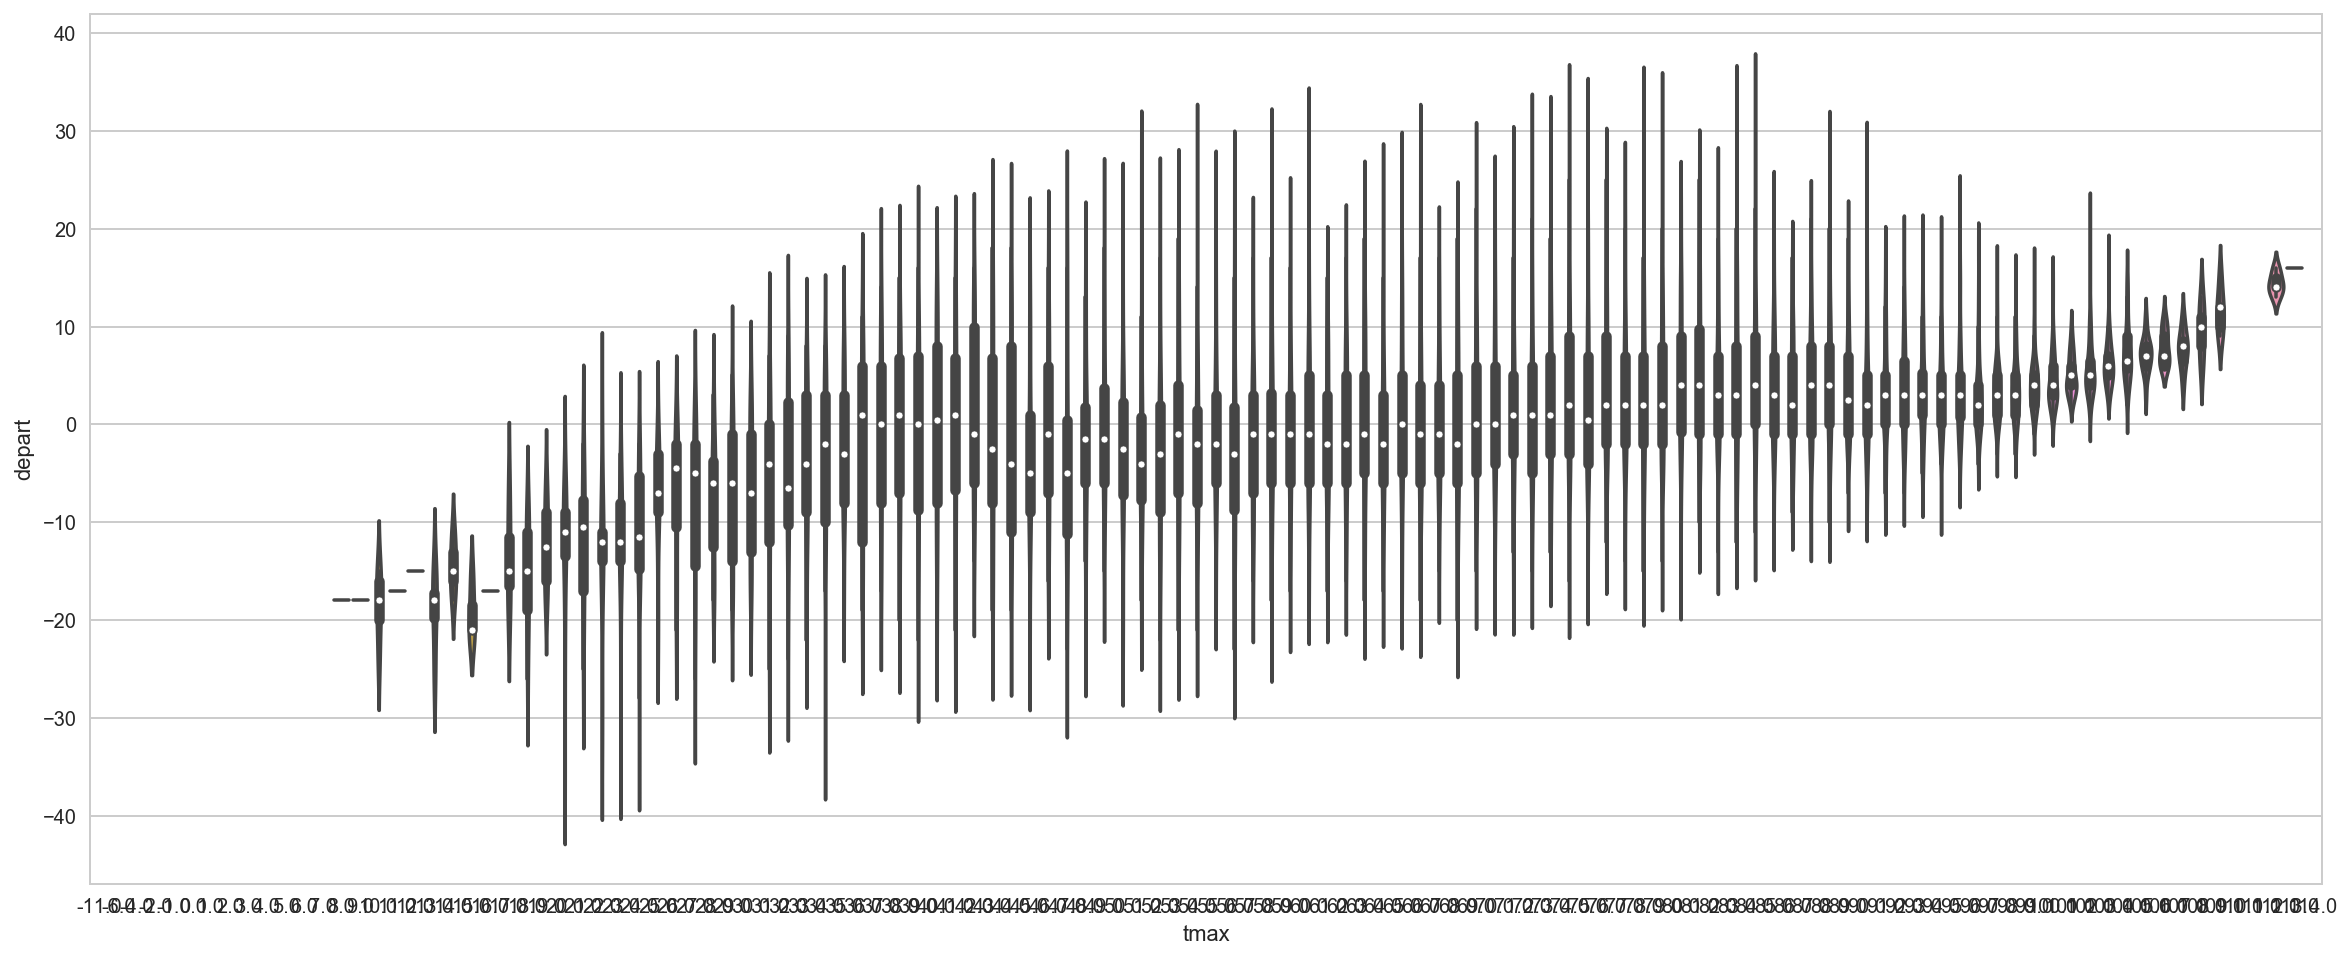

In [28]:
plt.figure(figsize=(20,8))
sns.violinplot(x="tmax", y="depart", data=df_wal_weather, jitter=True)
plt.show()

In [29]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
temp_imp = imp.fit_transform(df_wal_weather.iloc[:, [2,3,4,5]])

In [30]:
df_temp_imp = pd.DataFrame(temp_imp, columns=["tmax_imp", "tmin_imp", "tavg_imp", "depart_imp"])
df_temp_imp.tail()

,tmax_imp,tmin_imp,tavg_imp,depart_imp
20512,53.0,34.0,44.0,1.363091
20513,59.0,34.0,47.0,1.363091
20514,67.0,49.0,58.0,-4.000000
20515,45.0,33.0,39.0,-6.000000
20516,68.0,50.0,59.0,1.363091


In [31]:
df_temp_imp.describe()

,tmax_imp,tmin_imp,tavg_imp,depart_imp
count,20517.000000,20517.000000,20517.000000,20517.000000
mean,71.621131,50.654546,61.240130,1.363091
std,19.404265,18.710733,18.494412,5.066090
min,-11.000000,-21.000000,-16.000000,-35.000000
25%,61.000000,37.000000,50.000000,1.363091
50%,74.000000,52.000000,62.000000,1.363091
75%,86.000000,66.000000,76.000000,1.363091
max,114.000000,88.000000,100.000000,33.000000


In [32]:
df_wal_weather['idx'] = df_wal_weather.index
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,idx
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4,20512
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4,20513
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4,20514
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4,20515
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4,20516


In [33]:
df_temp_imp['idx'] = df_wal_weather.index
df_temp_imp.tail()

,tmax_imp,tmin_imp,tavg_imp,depart_imp,idx
20512,53.0,34.0,44.0,1.363091,20512
20513,59.0,34.0,47.0,1.363091,20513
20514,67.0,49.0,58.0,-4.000000,20514
20515,45.0,33.0,39.0,-6.000000,20515
20516,68.0,50.0,59.0,1.363091,20516


In [34]:
df_wal_weather = pd.merge(df_wal_weather, df_temp_imp, on='idx', how='left')
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,idx,tmax_imp,tmin_imp,tavg_imp,depart_imp
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4,20512,53.0,34.0,44.0,1.363091
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4,20513,59.0,34.0,47.0,1.363091
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4,20514,67.0,49.0,58.0,-4.000000
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4,20515,45.0,33.0,39.0,-6.000000
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4,20516,68.0,50.0,59.0,1.363091


In [35]:
cols = df_wal_weather.columns.tolist()
cols

['station_nbr',
 'date',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'year',
 'month',
 'day',
 'weekday',
 'idx',
 'tmax_imp',
 'tmin_imp',
 'tavg_imp',
 'depart_imp']

In [36]:
cols = ['idx', 
 'station_nbr',
 'date',
 'year',
 'month',
 'day',
 'weekday',
 'tmax_imp',
 'tmin_imp',
 'tavg_imp',
 'depart_imp',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed'
 ]

In [37]:
df_wal_weather = df_wal_weather[cols]
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2


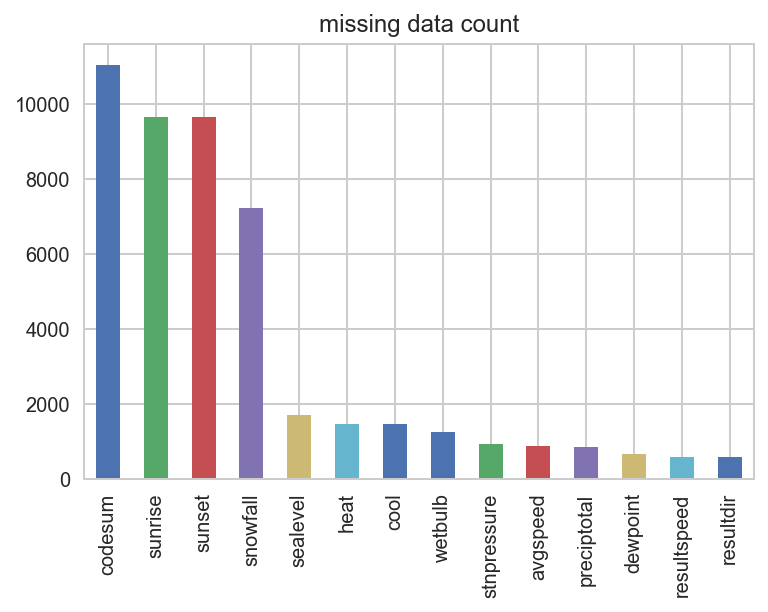

In [38]:
graph_na(df_wal_weather)

- codesum

In [39]:
df_wal_weather['codesum'] = df_wal_weather['codesum'].fillna('moderate')
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2


In [40]:
len(df_wal_weather['codesum'].unique())

449

In [41]:
code_list = df_wal_weather['codesum'].tolist()

In [42]:
df_wal_weather.head(14)

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,0,1,2012-01-01,2012,1,1,6,52.0,31.0,42.00000,1.363091,36,40,23,0,NaN,NaN,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20,4.6
1,1,2,2012-01-01,2012,1,1,6,48.0,33.0,41.00000,16.000000,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,2,3,2012-01-01,2012,1,1,6,55.0,34.0,45.00000,9.000000,24,36,20,0,0735,1720,moderate,0.0,0.00,29.77,30.47,9.9,31,10.0
3,3,4,2012-01-01,2012,1,1,6,63.0,47.0,55.00000,4.000000,28,43,10,0,0728,1742,moderate,0.0,0.00,29.79,30.48,8.0,35,8.2
4,4,6,2012-01-01,2012,1,1,6,63.0,34.0,49.00000,0.000000,31,43,16,0,0727,1742,moderate,0.0,0.00,29.95,30.47,14.0,36,13.8
5,5,7,2012-01-01,2012,1,1,6,50.0,33.0,42.00000,1.363091,26,35,23,0,NaN,NaN,moderate,0.0,0.00,29.15,30.54,10.3,32,10.2
6,6,8,2012-01-01,2012,1,1,6,66.0,45.0,61.24013,1.363091,34,46,NaN,NaN,NaN,NaN,RA BR,NaN,0.00,30.05,NaN,11.0,36,10.9
7,7,9,2012-01-01,2012,1,1,6,34.0,19.0,27.00000,1.363091,17,23,38,0,NaN,NaN,UP,NaN,T,29.34,30.09,22.8,30,22.5
8,8,10,2012-01-01,2012,1,1,6,73.0,53.0,63.00000,1.363091,55,58,2,0,0723,1738,FG+ FG BR,NaN,0.00,30.16,30.19,5.1,24,5.5
9,9,11,2012-01-01,2012,1,1,6,72.0,48.0,60.00000,7.000000,54,56,5,0,0724,1737,FG+ FG BR,0.0,0.00,30.15,30.18,4.6,23,4.8


- +앞에 오는 글자가 FG말고 다른게 있는지 확인

In [43]:
import re

for idx, i in enumerate(code_list):
#     print(idx)
    if '+' in i:
        A = re.search(r'(\w\w\+)', i)
        if A.group() != 'FG+':
            print(A.group())
    else:
        pass

- 아무것도 없으므로 +표기된 것은 heavy fog를 뜻함. 열 추가.

In [44]:
for idx, i in enumerate(code_list):
    if '+' in i:
        if '+' in i:
            code_list[idx] = 1
    else:
        code_list[idx] = 0

In [45]:
code_list[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [46]:
df_wal_weather['heavy_fog'] = code_list
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0


In [47]:
df_codesum_ohe = pd.read_csv("./data/df_codesum_ohe.csv")
del df_codesum_ohe['Unnamed: 0']

In [48]:
df_codesum_ohe.tail(15)

,FC,TS,GR,RA,DZ,SN,SG,GS,PL,IC,FG,BR,UP,HZ,FU,VA,DU,DS,PO,SA,SS,PY,SQ,DR,SH,FZ,MI,PR,BC,BL,VC
20502,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20504,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20508,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- sunrise

In [49]:
print(len(df_wal_weather['sunrise'].unique()))
df_wal_weather['sunrise'].unique()

219


array([nan, '0716', '0735', '0728', '0727', '0723', '0724', '0739',
       '0718', '0730', '0740', '0731', '0725', '0729', '0722', '0717',
       '0715', '0721', '0734', '0714', '0720', '0713', '0738', '0719',
       '0733', '0712', '0732', '0737', '0711', '0710', '0726', '0736',
       '0709', '0708', '0707', '0706', '0705', '0704', '0703', '0702',
       '0701', '0660', '0659', '0658', '0657', '0656', '0654', '0655',
       '0653', '0652', '0651', '0649', '0650', '0648', '0647', '0645',
       '0646', '0644', '0643', '0641', '0640', '0638', '0637', '0642',
       '0636', '0635', '0634', '0700', '0639', '0633', '0632', '0631',
       '0629', '0628', '0627', '0626', '0625', '0624', '0619', '0620',
       '0623', '0622', '0621', '0618', '0617', '0616', '0615', '0614',
       '0613', '0612', '0611', '0610', '0609', '0608', '0607', '0606',
       '0605', '0604', '0603', '0602', '0600', '0560', '0559', '0558',
       '0557', '0555', '0601', '0630', '0553', '0552', '0551', '0550',
       '0

In [50]:
def MakeHour(x):
    A = re.search(r'(\d\d)(\d\d)', str(x))
    return str(A.group(1))

def MakeMinute(x):
    A = re.search(r'(\d\d)(\d\d)', str(x))
    return str(A.group(2))

In [51]:
df_wal_weather['sunrise'] = df_wal_weather['sunrise'].fillna('9999')

In [52]:
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise'].apply(MakeHour)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise'].apply(MakeMinute)
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog,sunrise_hour,sunrise_min
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,9999,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0,99,99
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,9999,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0,99,99
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0,06,44
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0,06,24
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,9999,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0,99,99


In [53]:
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise_hour'].apply(Integerize)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise_min'].apply(Integerize)
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise_hour'].replace(99, np.nan)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise_min'].replace(99, np.nan)
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog,sunrise_hour,sunrise_min
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,9999,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0,NaN,NaN
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,9999,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0,NaN,NaN
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0,6.0,44.0
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0,6.0,24.0
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,9999,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0,NaN,NaN


In [54]:
len(df_wal_weather.columns)

28

In [55]:
sunrise_imp = imp.fit_transform(df_wal_weather.iloc[:, [1,3,4,5,26,27]])
df_sunrise_imp = pd.DataFrame(sunrise_imp, columns=["station_nbr", "year", "month", "day", "sunrise_hour_imp", "sunrise_min_imp"])
df_sunrise_imp.tail()

,station_nbr,year,month,day,sunrise_hour_imp,sunrise_min_imp
20512,16.0,2014.0,10.0,31.0,5.570021,28.036461
20513,17.0,2014.0,10.0,31.0,5.570021,28.036461
20514,18.0,2014.0,10.0,31.0,6.000000,44.000000
20515,19.0,2014.0,10.0,31.0,6.000000,24.000000
20516,20.0,2014.0,10.0,31.0,5.570021,28.036461


In [79]:
df_sunrise = pd.DataFrame(df_wal_weather.iloc[:, [1,2,3,4,5,26,27]])
df_sunrise.tail()

,station_nbr,date,year,month,day,sunrise_hour,sunrise_min
20512,16,2014-10-31,2014,10,31,NaN,NaN
20513,17,2014-10-31,2014,10,31,NaN,NaN
20514,18,2014-10-31,2014,10,31,6.0,44.0
20515,19,2014-10-31,2014,10,31,6.0,24.0
20516,20,2014-10-31,2014,10,31,NaN,NaN


In [85]:
df_sunrise['sum'] = df_sunrise['sunrise_hour'] + df_sunrise['sunrise_min']

In [95]:
df_sunrise.tail()

,station_nbr,date,year,month,day,sunrise_hour,sunrise_min,sum
20512,16,2014-10-31,2014,10,31,NaN,NaN,NaN
20513,17,2014-10-31,2014,10,31,NaN,NaN,NaN
20514,18,2014-10-31,2014,10,31,6.0,44.0,50.0
20515,19,2014-10-31,2014,10,31,6.0,24.0,30.0
20516,20,2014-10-31,2014,10,31,NaN,NaN,NaN


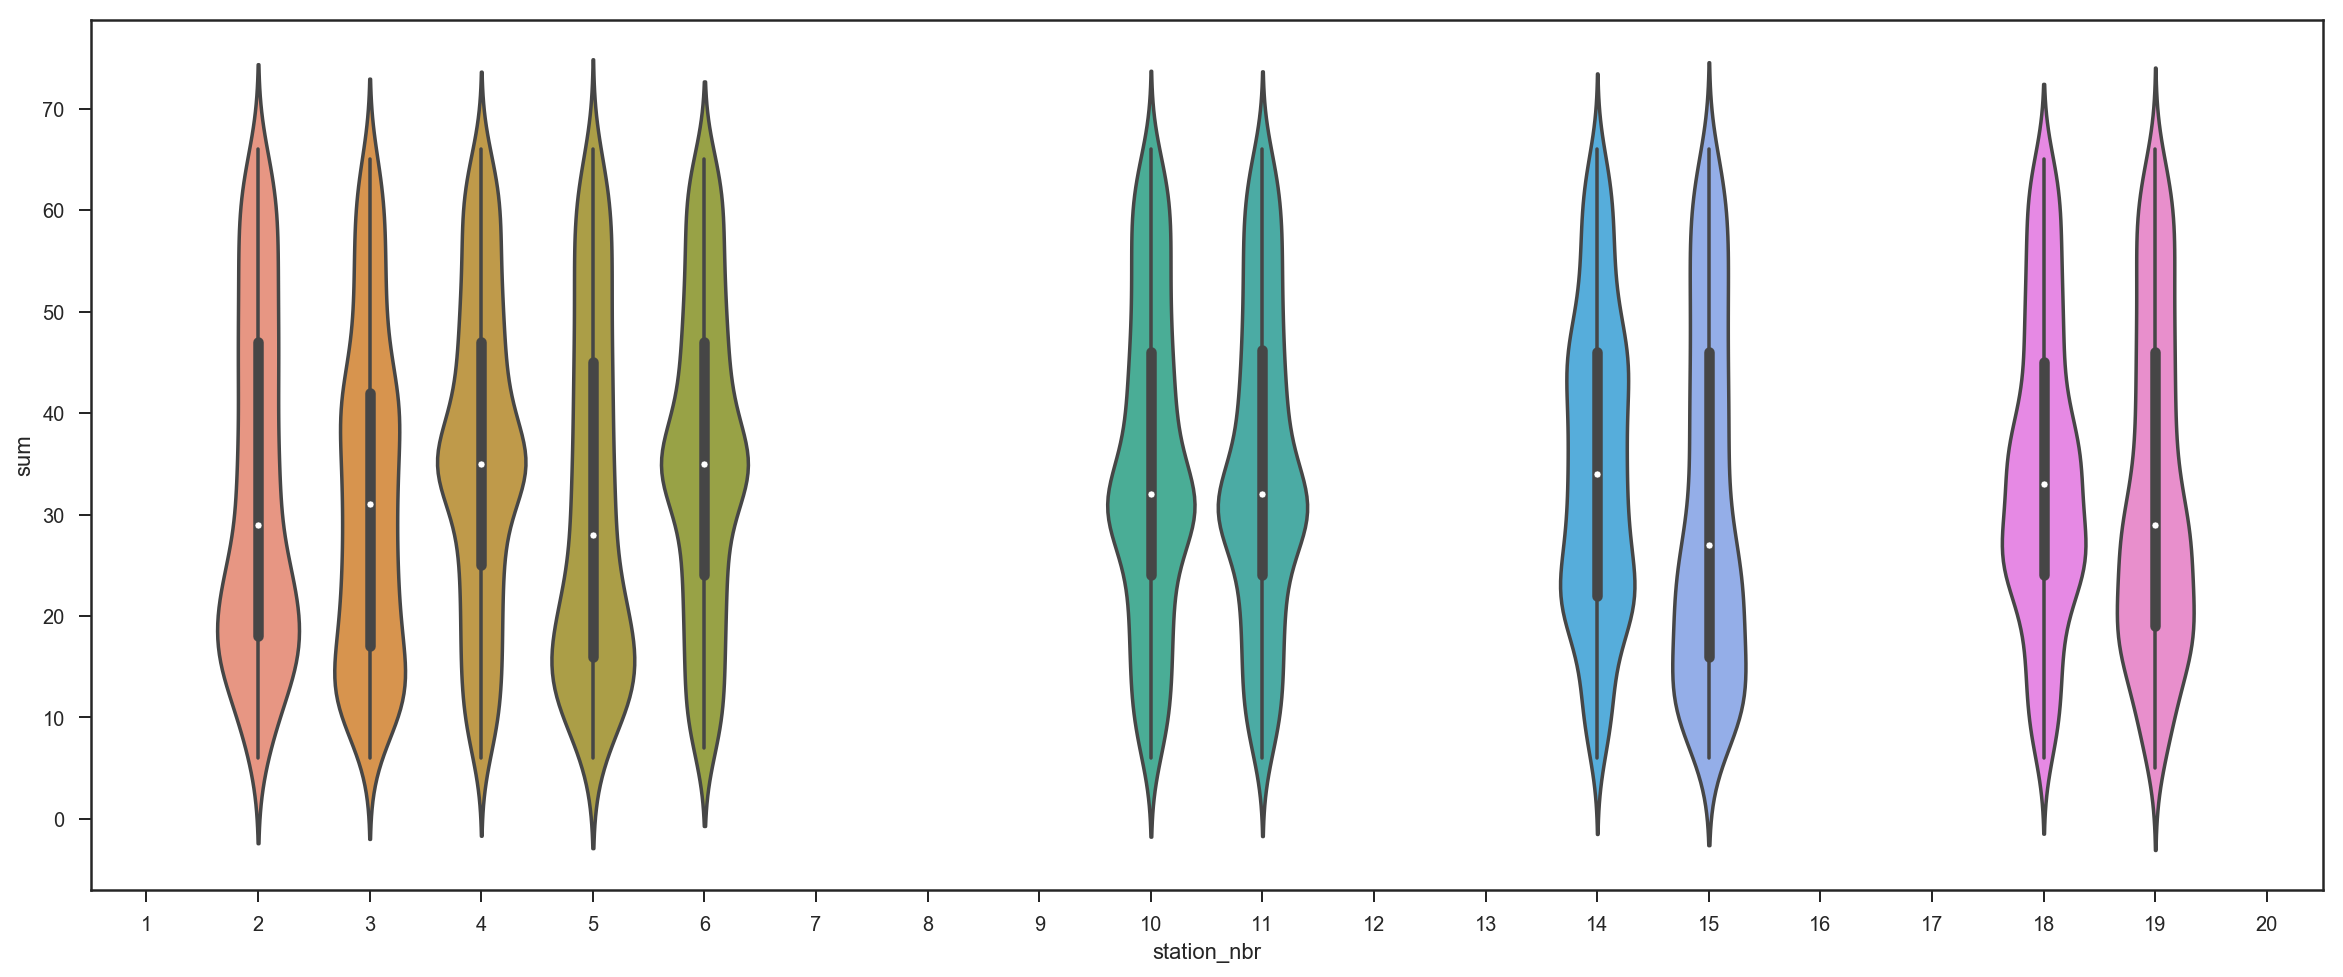

In [87]:
plt.figure(figsize=(20,8))
sns.violinplot(x="station_nbr", y="sum", data=df_sunrise, jitter=True)
plt.show()

In [104]:
corrmat = df_sunrise['station_nbr'].corr()
corrmat

TypeError: corr() missing 1 required positional argument: 'other'

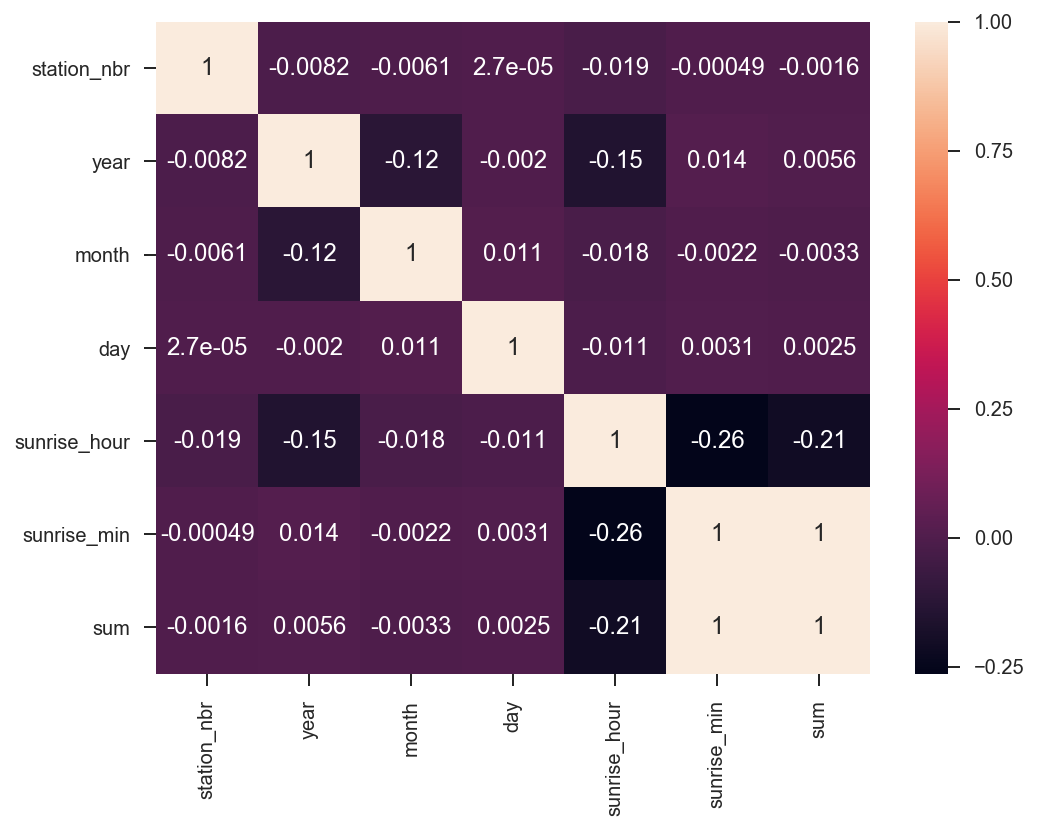

In [103]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)